# Benchmarking Dimensionality Reduction Algorithms on Human Genome!

## Importing Libraries

In [1]:
from script.preprocessing import load_data, make_plot_ready
from script.pca import perform_PCA
from script.umap import perform_UMAP
from script.tsne import perform_TSNE
from script.MDS import perform_MDS
from script.isomap import perform_Isomap
from script.autoencoder import perform_autoEncoder
from script.plotting import PlotClusters
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
# Accept preprocessed chromosomes only!
while True:
    chromNo = int(input("Enter a chromosone number from 1, 16, 17, 21"))
    if chromNo not in [1, 16, 17, 21]:
        continue
    break

print("Running on Chromosome Number:", chromNo)

In [3]:
data, genotypes = load_data("1kg_chr"+str(chromNo)+"_pca_recode.raw")

In [4]:
data.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs2775537_G,rs1148737_G,rs2801270_G,rs1296971_G,...,rs7279769_T,rs2245760_G,rs6518306_T,rs7275592_A,rs2839377_C,rs3747011_A,rs15047_T,rs2839378_C,rs9637231_T,rs10483083_T
0,HG00096,HG00096,0,0,0,-9,2,1,0,1,...,0,0,0,0,0,0,0,2,2,0
1,HG00097,HG00097,0,0,0,-9,1,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,HG00099,HG00099,0,0,0,-9,1,2,0,2,...,0,0,0,0,1,0,0,1,1,0
3,HG00100,HG00100,0,0,0,-9,1,1,0,1,...,0,1,0,1,2,0,0,0,0,0
4,HG00101,HG00101,0,0,0,-9,1,1,0,1,...,0,1,1,1,1,1,1,1,1,0


## PCA

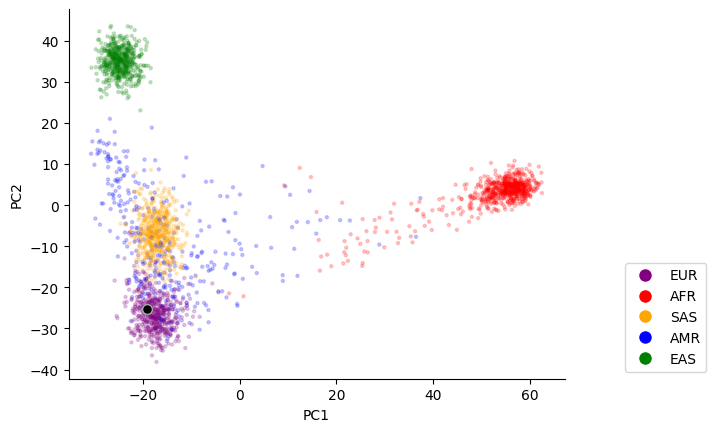

In [5]:
prefix = "PC"
n_components = 10
pcs = perform_PCA(genotypes, n_components)
pca_df = make_plot_ready(data, pcs, n_components, prefix)
PlotClusters(pca_df, 1, 2, prefix, "superpop", ["mgymrek"])

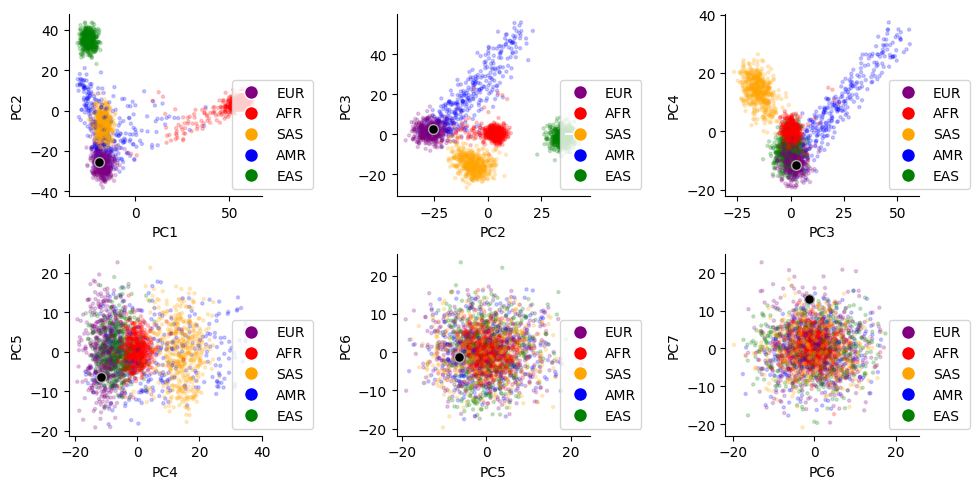

In [6]:
fignum = 1
prefix = 'PC'
fig = plt.figure()
fig.set_size_inches((10, 5))
for pc in range(1, 7):
    ax = fig.add_subplot(2, 3, fignum)
    use_legend=(pc==6)
    PlotClusters(pca_df, pc, pc+1, prefix, "superpop", ["mgymrek"],ax=ax)
    fignum += 1
fig.tight_layout()

## UMAP

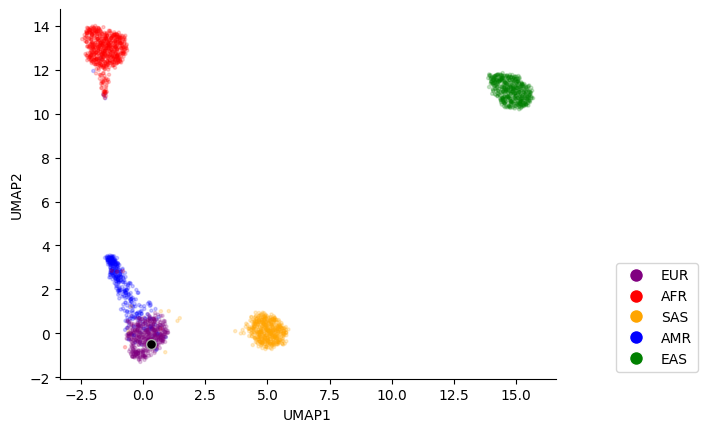

In [7]:
prefix = "UMAP"
n_components = 2
pcs = perform_UMAP(genotypes)
umap_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(umap_df, 1, 2, prefix, "superpop", ["mgymrek"])

## TSNE

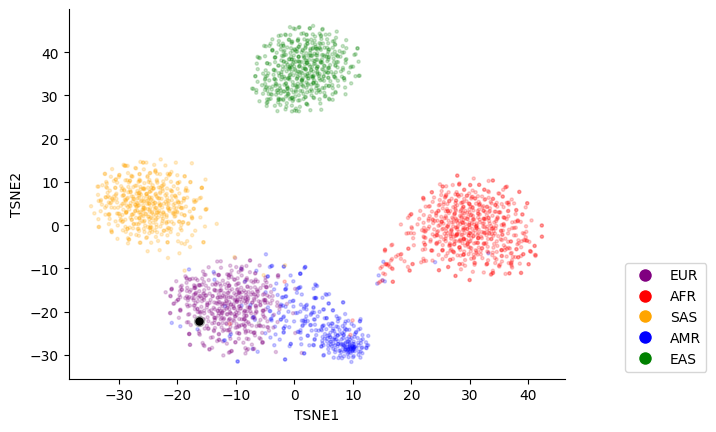

In [8]:
prefix = "TSNE"
n_components = 2
pcs = perform_TSNE(genotypes, n_components)
tsne_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(tsne_df, 1, 2, prefix, "superpop", ["mgymrek"])

## MDS

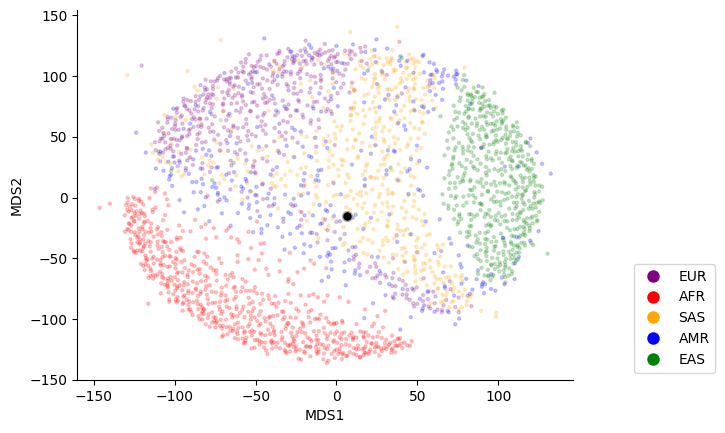

In [9]:
prefix = "MDS"
n_components = 2
pcs = perform_MDS(genotypes, n_components)
mds_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(mds_df, 1, 2, prefix, "superpop", ["mgymrek"])

## Isomap

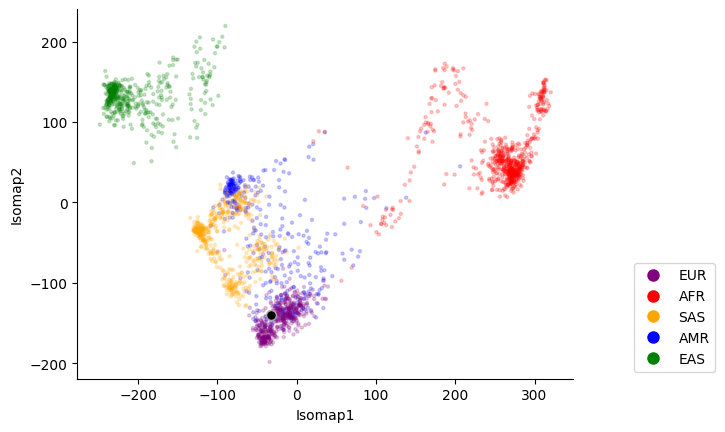

In [10]:
prefix = "Isomap"
n_components = 2
pcs = perform_Isomap(genotypes, n_components)
isomap_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(isomap_df, 1, 2, prefix, "superpop", ["mgymrek"])

## Autoencoders



Epoch 1/100

3/3 [==============================] - 2s 177ms/step - loss: 1.0001 - val_loss: 0.9105
Epoch 2/100
3/3 [==============================] - 0s 87ms/step - loss: 0.9940 - val_loss: 0.9103
Epoch 3/100
3/3 [==============================] - 0s 86ms/step - loss: 0.9665 - val_loss: 0.9099
Epoch 4/100
3/3 [==============================] - 0s 89ms/step - loss: 0.9468 - val_loss: 0.9093
Epoch 5/100
3/3 [==============================] - 0s 87ms/step - loss: 0.9404 - val_loss: 0.9086
Epoch 6/100
3/3 [==============================] - 0s 88ms/step - loss: 0.9395 - val_loss: 0.9078
Epoch 7/100
3/3 [==============================] - 0s 89ms/step - loss: 0.9375 - val_loss: 0.9071
Epoch 8/100
3/3 [==============================] - 0s 92ms/step - loss: 0.9359 - val_loss: 0.9063
Epoch 9/100
3/3 [==============================] - 0s 90ms/step - loss: 0.9349 - val_loss: 0.9055
Epoch 10/100
3/3 [==============================] - 0s 88ms/step - loss: 0.9341 - val_loss: 0.9047
Epoch 11/100
3/

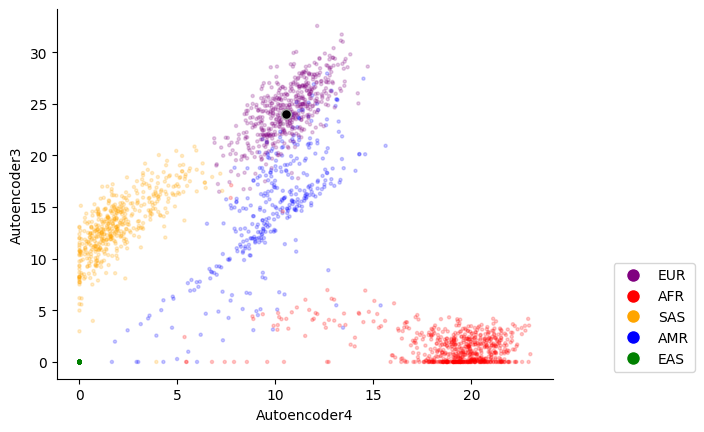

In [11]:
prefix = "Autoencoder"
n_components = 4
pcs = perform_autoEncoder(genotypes, n_components)
ae_df = make_plot_ready(data, pcs.T, n_components, prefix)
PlotClusters(ae_df, 4, 3, prefix, "superpop", ["mgymrek"])

## Plotting

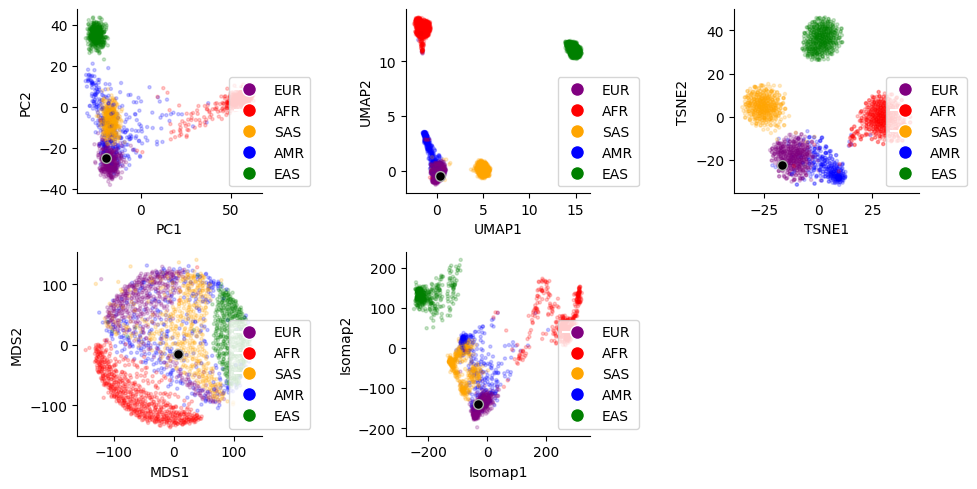

In [35]:
fignum = 1

iter_dict = {'PC':pca_df, 'UMAP':umap_df,'TSNE':tsne_df,'MDS':mds_df,'Isomap':isomap_df}

fig = plt.figure()
fig.set_size_inches((10, 5))
for pre in iter_dict:
    ax = fig.add_subplot(2, 3, fignum)
    tmpi = iter_dict[pre]
    PlotClusters(tmpi, 1, 2, pre, "superpop", ["mgymrek"], ax=ax)
    fignum += 1
fig.tight_layout()